## Problema 1: Modelo de Ising en $\mathbb{Z}^2$

Queremos modelar el ferromagnetismo en una placa metálica plana idealizada. Específicamente para $N\in\mathbb{N}$ (grande), las moléculas de la placa se ubican en la grilla 2-dimensional $\Lambda = \Lambda_N = \{-N,\ldots,N\}^2 \subseteq \mathbb{Z}^2$, y cada molécula posee un momento magnético o _spin_, el cual puede estar orientado hacia arriba o hacia abajo. Por lo tanto, el conjunto de posibles configuraciones es $E_N = \{-1,1\}^\Lambda$. Dado $x\in E_N$, y $m\in \Lambda$, denotamos $x(m) \in \{-1,1\}$ el spin del sitio $m$ en la configuración $x$. Trabajaremos en el espacio $E$ de configuraciones con spin fijo hacia arriba en el borde:

$$ E = \{ x\in E_N : x(m)=1, \forall m\in \partial \Lambda \},
\quad \text{donde} ~
\partial \Lambda = \Lambda_N \setminus \Lambda_{N-1}.$$

En un material ferromagnético, los spins de sitios cercanos tienen tendencia a alinearse; es decir, spins iguales en sitios contiguos tienen asociada menor energía. Específicamente, la energía de una configuración $x\in E_N$ viene dada por

$$ H(x) = \sum_{m \sim m'} [ x(m) - x(m')]^2,$$

donde $m\sim m'$ denota que $m$ y $m'$ son vecinos en la grilla, es decir, que están a distancia 1 (cada par $m,m'\in \Lambda$ aparece una sola vez en la sumatoria). Supondremos que la probabilidad de que el sistema se encuentre en la configuración $x\in E$ está dada por

$$ \pi_x = \frac{e^{-\beta H(x)}}{Z(\beta)},$$

para $\beta>0$ dado ($1/\beta$ es la temperatura), y $Z(\beta) = \sum_{y\in E} e^{-\beta H(y)}$ es la constante de normalización. Observe que lo anterior hace improbables las configuraciones con mayor energía, lo cual es consecuente con lo que ocurre en los sistemas físicos. Se desea simular realizaciones de la distribución $\pi \in \mathcal{P}(E)$.

> 1.1 - Calcule $|E|$. Argumente por qué es imposible en la práctica calcular $Z(\beta)$ explícitamente, incluso para $N$ pequeño (por ejemplo, $N=10$).

*Respuesta*: Para calcular $|E|$ calcularemos, $|\Lambda|$, para esto, basta notar que:

$$ |\Lambda| = |\{ -N, \dots, N\} \times \{ -N, \dots, N\}| = |\{ -N, \dots, N\}|^2 = (2 N + 1)^2 $$

luego, es claro que:

$$ |\partial \Lambda| = |\Lambda_N| - |\Lambda_{N-1}| = (2 N + 1)^2 - (2 (N-1) + 1)^2 = (2 N + 1)^2 - (2 N -1)^2 $$

Por lo tanto, como el cardinal de $E_N$ corresponde al numero de $x \in E_N$ tales que los $ m \in \partial \Lambda$ ya esten fijos, por lo tanto, se tendra que:

$$ |E| = |\{-1,1\}|^{|\Lambda| - |\partial \Lambda|} = 2^{(2 N + 1)^2 - (2 N + 1)^2 + (2 N -1)^2 } = 2^{(2 N -1)^2} $$

A partir de esto, es claro que es imposible en la practica calcular $Z(\beta)$ explicitamente, puesto que habria que hacer $|E|$ sumas, pero, como se puede observar, para un $N$ pequeño, por ejemplo: $N = 10$, se tiene que:

$$ |E| = 2^{19^2} \approx 4.697085\cdot 10^{108} $$

como se puede observar, es una cantidad enorme y eso que solo consideramos $N=10$, lo que implica que para $N$ de mayor tamaño el cálculo explicito de $Z(\beta)$ tomara una cantidad seguramente poco computable por su tamaño.

**Respuesta**:

Debido a lo anterior, no es posible simular $\pi$ directamente. Por este motivo, utilizaremos un algoritmo tipo _Markov chain Monte Carlo_ (MCMC) para realizar simulaciones aproximadas de $\pi$, según lo descrito en cátedra. Para esto, siga los siguientes pasos.

Consideremos el grafo $G$ sobre $E$ en el cual $xy$ es una arista de $G$ si y sólo si $x$ e $y$ difieren en exactamente un sitio, es decir, si y sólo si
$$ \exists m_0 \in \Lambda \setminus \partial \Lambda,
	\text{ tal que }
	x(m_0) = -y(m_0),
	\text{ y además }
	x(m) = y(m), \forall m\neq m_0. $$

> 1.2 - Escriba la matriz estocástica $R$ asociada a este grafo para el algoritmo de Metropolis y el de Gibbs. Obtenga una expresión explícita simple para $\frac{\pi_y R_{yx}}{\pi_x R_{xy}}$ en ambos casos ¿Cuál algoritmo es más conveniente usar y por qué?

La matriz de R de Gibbs es 
$$
R^{G}(x,y) =
\begin{cases}
  \pi_{y} \left(\sum_{\mathrm{z ∼ x}} \pi_{z} \right)^{-1}, & \text{si x ∼ y}\\
  0, & \text{si no}
\end{cases}
$$
Que reemplazando sería:

$$
R^{G}_{xy} =
\begin{cases}
  e^{-\beta H(y)} \left(\sum_{\mathrm{z ∼ x}} {e^{-\beta H(z)}}\right)^{-1}, & \text{si x ∼ y}\\
  0, & \text{si no}
\end{cases}
$$

Mientras que la matriz de metrópolis sería:

$$
\pi^{xy} =
\begin{cases}
  \frac{1}{deg_x}, & \text{si x ∼ y}\\
  0, & \text{si no}
\end{cases}
$$

Es decir, como hay $8N$ nodos en el borde, la cantidad de nodos en el interior serían $(2N+1)^2-8N = (2N-1)^2$, que serían la cantidad de vecinos de una matriz (cambiando cualquiera de los valores del interior de la matriz).

$$
R^{M}_{xy}
=
\begin{cases}
  \frac{1}{(2N-1)^2}, & \text{si x ∼ y}\\
  0, & \text{si no}
\end{cases}
$$

Ver que si x es vecino de y, entonces

$$
\frac{\pi_{y} R^M_{yx}}{\pi_{x} R^M_{xy}} = e^{-\beta (H(y) - H(x))}
$$

$$
\frac{\pi_{y} R^G_{yx}}{\pi_{x} R^G_{xy}} = \frac{ e^{-\beta H(y)} \left(\sum_{\mathrm{z ∼ y}} e^{-\beta H(z)} \right) } {e^{-\beta H(x)}  \left(\sum_{\mathrm{z ∼ x}} {e^{-\beta H(z)}}\right)}
$$

Gracias a la simplicidad en el cálculo, la matriz R de Metrópolis debe ser la más eficiente computacionalmente, por lo que debería ser mejor.

**Respuesta**:

> 2 - Describa el algoritmo MCMC correspondiente a este caso usando pseudo-código. En base a él, programe un método $X=$`Ising(N,beta,nf)` que simule $nf$ pasos de la cadena, grafique su estado cada cierta cantidad de pasos (mostrando la grilla $\Lambda$ y asociando un color al spin $-1$ y otro a $1$), y retorne el estado final $X$, en caso que $nf$ sea finito. Escoja los spins iniciales independientes con ley $2\cdot\text{Bernoulli}(p)-1$, para algún $p\in(1/2, 1)$ (por ejemplo $p=2/3$ ó $p=3/4$). Haga esto para 2 valores de $p$ distintivos. Comente la diferencia o similitud observadas entre ambos casos y la relevancia de dicha elección. Fije un valor para todo lo que viene.

Describiremos el algoritmo MCMC mediante el siguiente pseudo-código:

#### Pseudocodigo del Algoritmo MCMC para $ (X_n)_{n \in \mathbb{N}}$
1. `Input`: $N$, $\beta$ y $nf$

2. `Output`: $nf$ pasos de la cadena $(X_n)_{n \in \mathbb{N}} \sim CdM(μ, P)$

3. Estado Inicial $\leftarrow$ Matriz de dimension $2N + 1$ con spin en el borde = 1 y con Ley 2 Bernoulli(p) - 1
   en las demas casillas de tener un spin 1 o -1.

4. $X_0$ $\leftarrow$ Estado Inicial

5. $nf$ uniformes $U_k, V_k$

6. Para $n$ (`indice`) en $[0,nf-1]$:
   - $x \leftarrow X_n $
   
   - $Y_{n+1} \leftarrow f(V_{n+1}, X_n)$ ($f$ funcion de transicion)

   - Si se verifica $U_{n+1} \leq \frac{\pi_y R_{yx}}{\pi_x R_{xy}}$:
      - $X_{n+1} \leftarrow Y_{n+1} $
   - Si no:
      - $X_{n+1} \leftarrow x $


7. Fin del algoritmo.

In [1]:
import numpy as np
def crear_EN(N: int, p: float):
    '''
    Inicia con binomial(0.2), y coloca 1 en los bordes de la matriz cuadrada, y 0 en los demás. 

    Parámetros
    ----------
    N : int
        Tamaño de la matriz

    p : float
        Parámetro de la Bernoulli.

    Retorno
    -------
    E : np.ndarray
        Matriz con 1 en los bordes y 0 en el interior.
    
    Ejemplo
    -------
    >>> crear_EN(4, 0.5)
    array([[ 1,  1,  1,  1],
       [ 1,  1,  1,  1],
       [ 1,  1, -1,  1],
       [ 1,  1,  1,  1]]) 
    '''
    E = 2 * np.random.binomial(1, p, (N,N)) - 1
    
    for i in range(N):
        E[0, i] = 1
        E[i, 0] = 1
        E[-1, i] = 1
        E[i, -1] = 1
    return E

def son_vecinos(x: np.ndarray, y: np.ndarray):
    '''
    Revisa si las matrices x,y son vecinos (difieren en un solo valor en el interior).

    Parámetros
    ----------
    x : np.ndarray
        Matriz 1.
    y : np.ndarray
        Matriz 2.
    
    Retorno
    -------
    bool_son_vecinos : bool
        True o False si son vecinos o no.

    Ejemplo
    -------
    >>> x = np.array([[ 1,  1,  1,  1],
       [ 1,  1,  1,  1],
       [ 1,  1, -1,  1],
       [ 1,  1,  1,  1]])
    >>> y = np.array([[ 1,  1,  1,  1],
        [ 1,  1,  1,  1],
        [ 1,  1, -1,  1],
        [ 1,  1,  1,  1]])
    >>> son_vecinos(x,y)
    True
    '''
    N = len(x)
    son_vecinos = True

    # Revisar si son iguales
    if np.all(x == y) == True:
        son_vecinos = False

    else:
        # Revisar si difieren en más de 1 punto
        diff_count = 0
        for i in range(N):
            for j in range(N):
                if x[i, j] != y[i, j]:
                    diff_count += 1

                    # Si hay más de una diferencia, retornar False
                    if diff_count > 1:
                        son_vecinos = False
    return son_vecinos

def numero_de_vecinos(N: int):
    '''
    Retorna el número de vecinos de una matriz de NxN.

    Parámetros
    ----------
    N : int
        Tamaño matriz, que debe ser mayor a 3.
    
    Retorno
    -------
    cantidad_vecinos : int
        Cantidad de vecinos.
    
    Ejemplo
    -------
    >>> numero_de_vecinos(5)
    9
    '''
    cantidad_de_nodos_en_borde = 4*N - 4
    cantidad_total_de_nodos = N**2
    cantidad_vecinos = cantidad_total_de_nodos - cantidad_de_nodos_en_borde
    return cantidad_vecinos

def funcion_R_metropolis(x, y):
    '''
    Crea la función asociada a la matriz estocástica R, asociada al grafo G según el algoritmo de Metropolis.

    Parámetros
    ----------
    x : np.ndarray
        Matriz de -1 y 1
    y : np.ndarray
        Matriz de -1 y 1
    
    Retorno
    -------
    valor_R : np.ndarray
        Valor R[x,y] asociada a la matriz estocástica R, asociada al grafo G.
    
    Ejemplo
    -------
    >>> x = np.array([[ 1,  1,  1,  1],
       [ 1,  1,  1,  1],
       [ 1,  1, -1,  1],
       [ 1,  1,  1,  1]])
    >>> y = np.array([[ 1,  1,  1,  1],
            [ 1,  1,  1,  1],
            [ 1,  -1, -1,  1],
            [ 1,  1,  1,  1]])
    >>> funcion_R_metropolis(x, y)
    0.25
    '''
    N = len(x)
    if son_vecinos(x,y) == True:
        valor_R = 1 / numero_de_vecinos(N)
    else:
        valor_R = 0
    return valor_R

In [2]:
def funcion_transicion(R, x: np.ndarray) -> int:
    '''
    Función de transición asociada a la función R (representando matriz estocástica), es decir, f: E x [0,1]^n -> E.
    Realiza un solo paso.

    Parámetros
    ----------
        R : function
            Función asociada a la matriz estocástica de transición.
        x : np.ndarray
            Nodo inicial.

    Retorno
    -------
        nodo_actual : np.ndarray
            Nodo al que transiciona finalmente.
        
    Ejemplo
    -------
    >>> ejemplo_R = lambda x,y: 0.4
    >>> ejemplo_x = np.ones(shape=(5,5))
    >>> funcion_transicion(ejemplo_R, ejemplo_x, ejemplo_u)
    array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., -1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])
    '''
    n = len(x)
    nodo_final = np.copy(x)
    i = np.random.randint(1, n-2)
    j = np.random.randint(1, n-2)
    nodo_final[i,j] = -nodo_final[i,j]
    return nodo_final

def funcion_H(x: np.ndarray):
    '''
    Función H.

    Parámetros
    ----------
    x : np.ndarray
        Parámetro.

    Retorno : float
        Valor H(x) en los reales.
    '''
    N = len(x)
    suma = 0

    # Se suma derecha y abajo 
    for i in range(N - 1):
        for j in range(N - 1):
            suma += (x[i,j] - x[i+1, j])**2 + (x[i,j] - x[i, j+1])**2

    # Se rellena la última fila y última columna
    for i in range(N - 1):
        suma += (x[N-1,i] - x[N-1, i+1])**2 + (x[i, N-1] - x[i+1, N-1])**2
    return suma

def Ising(n: int, beta: float, nf: int, p=2/3):
    # n, beta, nf
    '''
    Usando el método de Metropolis-Hasting, simula una CdM(μ, P) con P asociada a la distribución invariante pi.

    Parámetros
    ----------
    n : int
        Número de nodos desde -n, ..., 0 ,..., n.

    beta : float
        Parámetro de

    nf : int
        Número de pasos a simular.

    Retorno
    -------
    X : np.ndarray
        Arreglo con los valores de la CdM en cada paso.
    
    Ejemplo
    -------
    >>> nodos = 7
    >>> pasos = 8
    >>> beta = 1.2
    >>> X = Ising(nodos, beta, pasos, p=0.6)

    >>> for i in range(pasos-1):
    >>>     fila, columna = np.where(X[i+1]-X[i])
    >>>     print(f"[i],[j] = {fila},{columna}")
    '''
    u = np.random.uniform(size=nf)

    # Estado inicial
    X0 = crear_EN(2*n + 1, p)
    X = []
    X.append(X0) # Nodo actual
    for n in range(nf - 1): 
        Y = funcion_transicion(funcion_R_metropolis, X[0])
        if u[n+1] <= np.exp(- beta * (funcion_H(Y) - funcion_H(X[0]))):
            X = [Y]
    return X


In [3]:
import matplotlib.pyplot as plt
def plotear_cadena(X):
    '''
    Grafica una cadena cada N pasos. Blanco es 1 y negro es -1.

    Parámetros
    ----------
    X : list
        Arreglo que representa la cadena de Markov.
    N : int
        Cada cuántos pasos se plotea.

    Retorno
    -------
    None
    '''
    plt.figure(figsize=(6, 6))
    plt.imshow(X[0], cmap='gray', vmin=-1, vmax=1, origin='lower')
    plt.colorbar()
    plt.title(f"Estado final de la Cadena de Markov de Ising")
    plt.xlabel("Columnas")
    plt.ylabel("Filas")
    plt.show()
    return 

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import display, clear_output

def plotear_cadena_animacion(X, N: int, beta):
    '''
    Grafica una cadena cada N pasos. Blanco es 1 y negro es -1.

    Parámetros
    ----------
    X : list
        Lista de estados que representan la cadena de Markov.
    N : int
        Cada cuántos pasos se plotea.

    Retorno
    -------
    None
    '''

    for i, estado in enumerate(X):
        if (i + 1) % N == 0 or i == 0:
            plt.figure(figsize=(6, 6), facecolor='white')  # Establece el fondo blanco
            plt.imshow(estado, cmap='gray', vmin=-1, vmax=1, origin='lower')
            plt.colorbar()
            plt.title(f"Estado {i+1} de la Cadena para Beta = {beta}")
            plt.xlabel("Columnas")
            plt.ylabel("Filas")

            # Muestra la figura en el entorno
            display(plt.gcf())
            clear_output(wait=True)
            plt.close()


In [41]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import display, clear_output

def plotear_cadena_animacion_1(X, N: int, p):
    '''
    Grafica una cadena cada N pasos. Blanco es 1 y negro es -1.

    Parámetros
    ----------
    X : list
        Lista de estados que representan la cadena de Markov.
    N : int
        Cada cuántos pasos se plotea.

    Retorno
    -------
    None
    '''

    for i, estado in enumerate(X):
        if (i + 1) % N == 0 or i == 0:
            plt.figure(figsize=(6, 6), facecolor='white')  # Establece el fondo blanco
            plt.imshow(estado, cmap='gray', vmin=-1, vmax=1, origin='lower')
            plt.colorbar()
            plt.title(f"Estado {i+1} de la Cadena para p = {p}")
            plt.xlabel("Columnas")
            plt.ylabel("Filas")

            # Muestra la figura en el entorno
            display(plt.gcf())
            clear_output(wait=True)
            plt.close()


Interpretemos. Probemos con $p = 0.6$ y $p=0.9$.

In [27]:
nodos = 50
pasos = 100
beta = 1.2

X_1 = Ising(nodos, beta, pasos, p=0.6)
X_2 = Ising(nodos, beta, pasos, p=0.9)

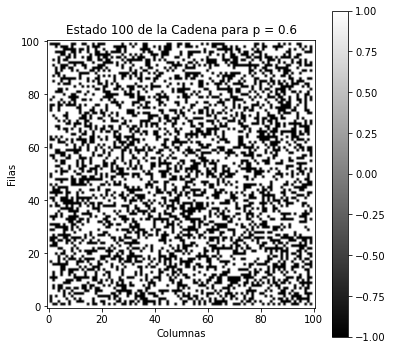

In [43]:
plotear_cadena_animacion_1(X_1,5, 0.6)

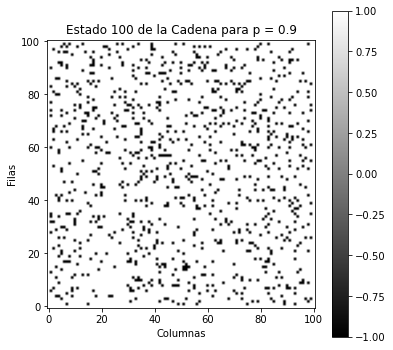

In [44]:
plotear_cadena_animacion_1(X_2,5, 0.9)

In [52]:
print(f"Número de transiciones para p = 0.6:  {cantidad_de_transiciones(X_1)}")
print(f"Número de transiciones para p = 0.9:  {cantidad_de_transiciones(X_2)}")

Número de transiciones para p = 0.6:  68
Número de transiciones para p = 0.9:  14


Se observa que a medida que $p$ aumenta, hay menos cambios en la cantidad de nodos. Esto se debe a que el algoritmo de Metropolis rechaza más frecuente porque la comparación se vuelve más exigente. Es por ello que se debe escoger un valor de $p$ representativo para el problema (ya sea si los spins son propensos a cambiar en cada paso o no).

Fijaremos el valor $p=0.75$, un valor intermedio para tener un equilibrio entre los cambios, de modo que cambie a veces, y otros no.

En lo que sigue, fije $N \in \{50,\ldots,200\}$ (lo más grande que se pueda, mientras la simulación sea fluida).

> 3 -  Observe el comportamiento de la cadena en el tiempo largo para un $\beta$ pequeño y otro grande (digamos, escoja un $\beta<0.1$ y otro $\beta>5$). Grafique y comente.

In [32]:
print("### Loading ###")
Cadena1 = Ising(50, 0.09, 10000, p=3/4)
print("### Primera cadena completada ###")
Cadena2 = Ising(50, 7, 10000, p=3/4)
print("### Completado! ###")

### Loading ###
### Primera cadena completada ###
### Completado! ###


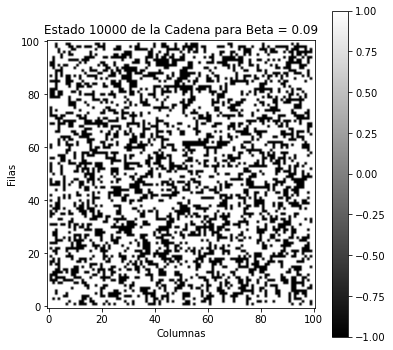

In [49]:
plotear_cadena_animacion(Cadena1, 250, 0.09)

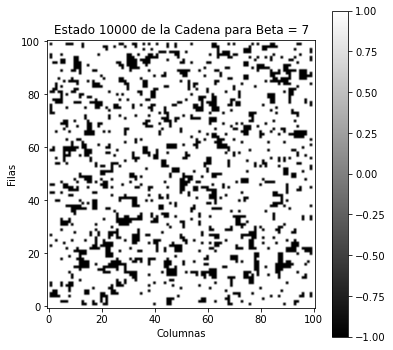

In [50]:
plotear_cadena_animacion(Cadena2, 250, 7)

Se puede apreciar que para $ \beta < 0.1$ hay mas spins hacia arriba en la gran mayoria de espacios que en el caso $\beta > 5$, junto con ser mas homogeneo (en relacion a la cantidad de spins arriba vs spins abajo).